# Definition
## Inner product
Assume O(0,0), A($x_a$,$y_a$), B($x_b$,$y_b$), then the inner product is defined as:
$$
<OA,OB>=\frac{1}{2}(OA^2+OB^2-AB^2) \\
= \frac{1}{2}(x_a^2 + y_a^2) + \frac{1}{2}(x_b^2 + y_b^2)-\frac{1}{2}[(x_b-x_a)^2+(y_b-y_a)^2]\\
= x_a*x_b + y_a*y_b
$$
Statistics:  
Variance: $\sum_i{(X_i-\bar{X})^2}$ <=> $x_a^2 + y_a^2$  
Covariance: $\sum_i{(X_i-\bar{X})(Y_i-\bar{Y})}$ <=> $x_a*x_b + y_a*y_b$  

## Statistic test
1. Monte Caro test for two series following same distribution: randomly exchange the corresponding values between two series. 
2. Monte Caro test for correlation coefficent: randomly exchange the corresponding values between two distributions.


In [1]:
import os
from GREB_ISM_LIB import Gvar, ImParam
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from angpy import FigCustom

def wcorr(f1,f2):
    # correlation coefficient
    from scipy.stats import wasserstein_distance as wdis
    import numpy as np
    f0   = np.random.normal(0,1,1000)
    f1a  = (f1 - np.mean(f1))/np.std(f1)
    f2a  = (f2 - np.mean(f2))/np.std(f2)
    disOA = wdis(f0,f1a)
    disOB = wdis(f0,f2a)
    disAB = wdis(f1a,f2a)
    #if np.max([disOA,disOB])<10*np.min([disOA,disOB]):
    r     = -(disAB**2-disOA**2-disOB**2)/(disOA*disOB*2)
        
    print('W(f0,f1)=%0.3f'%disOA)
    print('W(f0,f2)=%0.3f'%disOB)
    print('W(f1,f2)=%0.3f'%disAB)
    print('Corr. =%0.3f'%r)
    keytab = {'histtype':'step','density':True}
    plt.figure()
    plt.hist([f0,f1a,f2a],**keytab)
    plt.legend(['f2','f1','f0'])
    plt.figure()
    plt.hist(f1a,**keytab)
    plt.figure()
    plt.hist(f2a,**keytab)
    return r 

def wtest(f1,f2,iternum=500):
    # Wasserstein test
    from scipy.stats import wasserstein_distance as wdis
    import numpy as np
    
    #f1a = np.array(f1-np.mean(f1))
    #f2a = np.array(f2-np.mean(f2))
    dim = min([len(f1),len(f2)])
    f1a = np.array((f1 - np.mean(f1))/np.std(f1))
    f2a = np.array((f2 - np.mean(f2))/np.std(f2))
    dis = wdis(f1a,f2a)
    
    # Monte Caro test
    dis_exp = np.zeros(iternum)
    for it in range(iternum):
        # exchange random data between two series
        xnum        = np.random.randint(0,dim)
        xind        = np.random.randint(0,dim,xnum)
        f1_t        = f1a.copy()
        f2_t        = f2a.copy() 
        f1_t[xind]  = f2a[xind]
        f2_t[xind]  = f1a[xind]
        # simplely adding random 
        # f1_t        = f1a + np.random.normal(0,1,len(f1a))
        # f2_t        = f2a + np.random.normal(0,1,len(f2a))
        dis_exp[it] = wdis(f1_t,f2_t)
    dis_test = np.sort(dis_exp)
    
    dis_sig  = dis > dis_test[-10]
    return dis,dis_sig

<xarray.DataArray 'lon' ()>
array(-178., dtype=float32)
Coordinates:
    lon      float32 -178.0
<xarray.DataArray 'lon' ()>
array(-177., dtype=float32)
Coordinates:
    lon      float32 -177.0
<xarray.DataArray 'lon' ()>
array(-176., dtype=float32)
Coordinates:
    lon      float32 -176.0
<xarray.DataArray 'lon' ()>
array(-175., dtype=float32)
Coordinates:
    lon      float32 -175.0
<xarray.DataArray 'lon' ()>
array(-174., dtype=float32)
Coordinates:
    lon      float32 -174.0
<xarray.DataArray 'lon' ()>
array(-173., dtype=float32)
Coordinates:
    lon      float32 -173.0
<xarray.DataArray 'lon' ()>
array(-172., dtype=float32)
Coordinates:
    lon      float32 -172.0
<xarray.DataArray 'lon' ()>
array(-171., dtype=float32)
Coordinates:
    lon      float32 -171.0
<xarray.DataArray 'lon' ()>
array(-170., dtype=float32)
Coordinates:
    lon      float32 -170.0
<xarray.DataArray 'lon' ()>
array(-169., dtype=float32)
Coordinates:
    lon      float32 -169.0
<xarray.DataArray 'lon' ()>
ar

<xarray.DataArray 'lon' ()>
array(-93., dtype=float32)
Coordinates:
    lon      float32 -93.0
<xarray.DataArray 'lon' ()>
array(-92., dtype=float32)
Coordinates:
    lon      float32 -92.0
<xarray.DataArray 'lon' ()>
array(-91., dtype=float32)
Coordinates:
    lon      float32 -91.0
<xarray.DataArray 'lon' ()>
array(-90., dtype=float32)
Coordinates:
    lon      float32 -90.0
<xarray.DataArray 'lon' ()>
array(-89., dtype=float32)
Coordinates:
    lon      float32 -89.0
<xarray.DataArray 'lon' ()>
array(-88., dtype=float32)
Coordinates:
    lon      float32 -88.0
<xarray.DataArray 'lon' ()>
array(-87., dtype=float32)
Coordinates:
    lon      float32 -87.0
<xarray.DataArray 'lon' ()>
array(-86., dtype=float32)
Coordinates:
    lon      float32 -86.0
<xarray.DataArray 'lon' ()>
array(-85., dtype=float32)
Coordinates:
    lon      float32 -85.0
<xarray.DataArray 'lon' ()>
array(-84., dtype=float32)
Coordinates:
    lon      float32 -84.0
<xarray.DataArray 'lon' ()>
array(-83., dtype=floa

<xarray.DataArray 'lon' ()>
array(-6., dtype=float32)
Coordinates:
    lon      float32 -6.0
<xarray.DataArray 'lon' ()>
array(-5., dtype=float32)
Coordinates:
    lon      float32 -5.0
<xarray.DataArray 'lon' ()>
array(-4., dtype=float32)
Coordinates:
    lon      float32 -4.0
<xarray.DataArray 'lon' ()>
array(-3., dtype=float32)
Coordinates:
    lon      float32 -3.0
<xarray.DataArray 'lon' ()>
array(-2., dtype=float32)
Coordinates:
    lon      float32 -2.0
<xarray.DataArray 'lon' ()>
array(-1., dtype=float32)
Coordinates:
    lon      float32 -1.0
<xarray.DataArray 'lon' ()>
array(0., dtype=float32)
Coordinates:
    lon      float32 0.0
<xarray.DataArray 'lon' ()>
array(1., dtype=float32)
Coordinates:
    lon      float32 1.0
<xarray.DataArray 'lon' ()>
array(2., dtype=float32)
Coordinates:
    lon      float32 2.0
<xarray.DataArray 'lon' ()>
array(3., dtype=float32)
Coordinates:
    lon      float32 3.0
<xarray.DataArray 'lon' ()>
array(4., dtype=float32)
Coordinates:
    lon     

<xarray.DataArray 'lon' ()>
array(83., dtype=float32)
Coordinates:
    lon      float32 83.0
<xarray.DataArray 'lon' ()>
array(84., dtype=float32)
Coordinates:
    lon      float32 84.0
<xarray.DataArray 'lon' ()>
array(85., dtype=float32)
Coordinates:
    lon      float32 85.0
<xarray.DataArray 'lon' ()>
array(86., dtype=float32)
Coordinates:
    lon      float32 86.0
<xarray.DataArray 'lon' ()>
array(87., dtype=float32)
Coordinates:
    lon      float32 87.0
<xarray.DataArray 'lon' ()>
array(88., dtype=float32)
Coordinates:
    lon      float32 88.0
<xarray.DataArray 'lon' ()>
array(89., dtype=float32)
Coordinates:
    lon      float32 89.0
<xarray.DataArray 'lon' ()>
array(90., dtype=float32)
Coordinates:
    lon      float32 90.0
<xarray.DataArray 'lon' ()>
array(91., dtype=float32)
Coordinates:
    lon      float32 91.0
<xarray.DataArray 'lon' ()>
array(92., dtype=float32)
Coordinates:
    lon      float32 92.0
<xarray.DataArray 'lon' ()>
array(93., dtype=float32)
Coordinates:
   

<xarray.DataArray 'lon' ()>
array(170., dtype=float32)
Coordinates:
    lon      float32 170.0
<xarray.DataArray 'lon' ()>
array(171., dtype=float32)
Coordinates:
    lon      float32 171.0
<xarray.DataArray 'lon' ()>
array(172., dtype=float32)
Coordinates:
    lon      float32 172.0
<xarray.DataArray 'lon' ()>
array(173., dtype=float32)
Coordinates:
    lon      float32 173.0
<xarray.DataArray 'lon' ()>
array(174., dtype=float32)
Coordinates:
    lon      float32 174.0
<xarray.DataArray 'lon' ()>
array(175., dtype=float32)
Coordinates:
    lon      float32 175.0
<xarray.DataArray 'lon' ()>
array(176., dtype=float32)
Coordinates:
    lon      float32 176.0
<xarray.DataArray 'lon' ()>
array(177., dtype=float32)
Coordinates:
    lon      float32 177.0
<xarray.DataArray 'lon' ()>
array(178., dtype=float32)
Coordinates:
    lon      float32 178.0
<xarray.DataArray 'lon' ()>
array(179., dtype=float32)
Coordinates:
    lon      float32 179.0
<xarray.DataArray 'lon' ()>
array(180., dtype=floa

/var/folders/0p/rry2wmy92993f9z97d6hbxjw2v33rb/T/ipykernel_16433/1077169237.py:129: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_visible(True)


<xarray.DataArray 'lon' ()>
array(-178., dtype=float32)
Coordinates:
    lon      float32 -178.0
<xarray.DataArray 'lon' ()>
array(-177., dtype=float32)
Coordinates:
    lon      float32 -177.0
<xarray.DataArray 'lon' ()>
array(-176., dtype=float32)
Coordinates:
    lon      float32 -176.0
<xarray.DataArray 'lon' ()>
array(-175., dtype=float32)
Coordinates:
    lon      float32 -175.0
<xarray.DataArray 'lon' ()>
array(-174., dtype=float32)
Coordinates:
    lon      float32 -174.0
<xarray.DataArray 'lon' ()>
array(-173., dtype=float32)
Coordinates:
    lon      float32 -173.0
<xarray.DataArray 'lon' ()>
array(-172., dtype=float32)
Coordinates:
    lon      float32 -172.0
<xarray.DataArray 'lon' ()>
array(-171., dtype=float32)
Coordinates:
    lon      float32 -171.0
<xarray.DataArray 'lon' ()>
array(-170., dtype=float32)
Coordinates:
    lon      float32 -170.0
<xarray.DataArray 'lon' ()>
array(-169., dtype=float32)
Coordinates:
    lon      float32 -169.0
<xarray.DataArray 'lon' ()>
ar

<xarray.DataArray 'lon' ()>
array(-93., dtype=float32)
Coordinates:
    lon      float32 -93.0
<xarray.DataArray 'lon' ()>
array(-92., dtype=float32)
Coordinates:
    lon      float32 -92.0
<xarray.DataArray 'lon' ()>
array(-91., dtype=float32)
Coordinates:
    lon      float32 -91.0
<xarray.DataArray 'lon' ()>
array(-90., dtype=float32)
Coordinates:
    lon      float32 -90.0
<xarray.DataArray 'lon' ()>
array(-89., dtype=float32)
Coordinates:
    lon      float32 -89.0
<xarray.DataArray 'lon' ()>
array(-88., dtype=float32)
Coordinates:
    lon      float32 -88.0
<xarray.DataArray 'lon' ()>
array(-87., dtype=float32)
Coordinates:
    lon      float32 -87.0
<xarray.DataArray 'lon' ()>
array(-86., dtype=float32)
Coordinates:
    lon      float32 -86.0
<xarray.DataArray 'lon' ()>
array(-85., dtype=float32)
Coordinates:
    lon      float32 -85.0
<xarray.DataArray 'lon' ()>
array(-84., dtype=float32)
Coordinates:
    lon      float32 -84.0
<xarray.DataArray 'lon' ()>
array(-83., dtype=floa

<xarray.DataArray 'lon' ()>
array(-6., dtype=float32)
Coordinates:
    lon      float32 -6.0
<xarray.DataArray 'lon' ()>
array(-5., dtype=float32)
Coordinates:
    lon      float32 -5.0
<xarray.DataArray 'lon' ()>
array(-4., dtype=float32)
Coordinates:
    lon      float32 -4.0
<xarray.DataArray 'lon' ()>
array(-3., dtype=float32)
Coordinates:
    lon      float32 -3.0
<xarray.DataArray 'lon' ()>
array(-2., dtype=float32)
Coordinates:
    lon      float32 -2.0
<xarray.DataArray 'lon' ()>
array(-1., dtype=float32)
Coordinates:
    lon      float32 -1.0
<xarray.DataArray 'lon' ()>
array(0., dtype=float32)
Coordinates:
    lon      float32 0.0
<xarray.DataArray 'lon' ()>
array(1., dtype=float32)
Coordinates:
    lon      float32 1.0
<xarray.DataArray 'lon' ()>
array(2., dtype=float32)
Coordinates:
    lon      float32 2.0
<xarray.DataArray 'lon' ()>
array(3., dtype=float32)
Coordinates:
    lon      float32 3.0
<xarray.DataArray 'lon' ()>
array(4., dtype=float32)
Coordinates:
    lon     

<xarray.DataArray 'lon' ()>
array(83., dtype=float32)
Coordinates:
    lon      float32 83.0
<xarray.DataArray 'lon' ()>
array(84., dtype=float32)
Coordinates:
    lon      float32 84.0
<xarray.DataArray 'lon' ()>
array(85., dtype=float32)
Coordinates:
    lon      float32 85.0
<xarray.DataArray 'lon' ()>
array(86., dtype=float32)
Coordinates:
    lon      float32 86.0
<xarray.DataArray 'lon' ()>
array(87., dtype=float32)
Coordinates:
    lon      float32 87.0
<xarray.DataArray 'lon' ()>
array(88., dtype=float32)
Coordinates:
    lon      float32 88.0
<xarray.DataArray 'lon' ()>
array(89., dtype=float32)
Coordinates:
    lon      float32 89.0
<xarray.DataArray 'lon' ()>
array(90., dtype=float32)
Coordinates:
    lon      float32 90.0
<xarray.DataArray 'lon' ()>
array(91., dtype=float32)
Coordinates:
    lon      float32 91.0
<xarray.DataArray 'lon' ()>
array(92., dtype=float32)
Coordinates:
    lon      float32 92.0
<xarray.DataArray 'lon' ()>
array(93., dtype=float32)
Coordinates:
   

<xarray.DataArray 'lon' ()>
array(170., dtype=float32)
Coordinates:
    lon      float32 170.0
<xarray.DataArray 'lon' ()>
array(171., dtype=float32)
Coordinates:
    lon      float32 171.0
<xarray.DataArray 'lon' ()>
array(172., dtype=float32)
Coordinates:
    lon      float32 172.0
<xarray.DataArray 'lon' ()>
array(173., dtype=float32)
Coordinates:
    lon      float32 173.0
<xarray.DataArray 'lon' ()>
array(174., dtype=float32)
Coordinates:
    lon      float32 174.0
<xarray.DataArray 'lon' ()>
array(175., dtype=float32)
Coordinates:
    lon      float32 175.0
<xarray.DataArray 'lon' ()>
array(176., dtype=float32)
Coordinates:
    lon      float32 176.0
<xarray.DataArray 'lon' ()>
array(177., dtype=float32)
Coordinates:
    lon      float32 177.0
<xarray.DataArray 'lon' ()>
array(178., dtype=float32)
Coordinates:
    lon      float32 178.0
<xarray.DataArray 'lon' ()>
array(179., dtype=float32)
Coordinates:
    lon      float32 179.0
<xarray.DataArray 'lon' ()>
array(180., dtype=floa

/var/folders/0p/rry2wmy92993f9z97d6hbxjw2v33rb/T/ipykernel_16433/1077169237.py:129: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_visible(True)


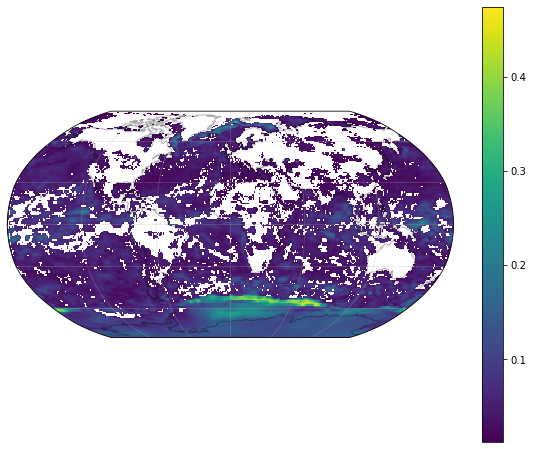

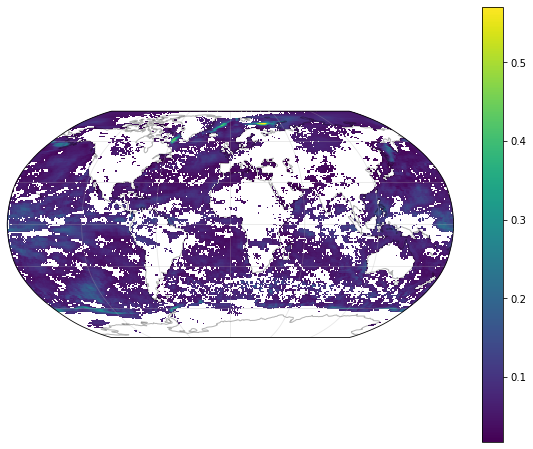

In [2]:
def MMT(inputdata):
    import scipy.stats as stats
    import pyhomogeneity as hg
    #res  = hg.pettitt_test(inputdata)
    #cp   = inputdata.time[res.cp]
    cplst = list()
    time  = inputdata.time
    ipdif = inputdata
    #ipdif = inputdata
    smthr = 10
    for k in range(smthr,len(time)-smthr):
        res = stats.ttest_ind(ipdif[k-smthr:k],ipdif[k:k+smthr])
        print(time[k],res)
        if res[1]<0.05:
            cplst.append(time[k])
    cp    = np.array(cplst)
    return cp

def data_pre_process(flag='global'):
        gfile  = Gvar()
        # ERA5
        #varnm  = 't2m'
        #filenm = './ERA5_daily/ERA5_daily_t2m.ctl'
        #years  = 1998; yeare = 2013
        # 20th century reanalysis
        
        if dataset == 'ER20':
            gfile.ga('open %s'%filenm)
        else:
            gfile.ga('sdfopen %s'%filenm)
            
        if flag=='global':
            gfile.set(['x 1','y 1','time 01jan%i 31dec%i'%(years,(years+yeare-1)/2)])
            data1 = gfile.hems(varnm,'g') 
            gfile.set(['x 1','y 1','time 01jan%i 31dec%i'%((years+yeare+1)/2,yeare)])
            data2 = gfile.hems(varnm,'g')
        elif flag=='regional':
            gfile.set(['lon -178 180','time 01jan%i 31dec%i'%(years,(years+yeare-1)/2)])
            if dataset == 'CRU':
                gfile.set(['lon -178 177','time 01jan%i 31dec%i'%(years,(years+yeare-1)/2)])
            data1 = gfile.xarray(varnm)[varnm] 
            gfile.set(['lon -178 180','time 01jan%i 31dec%i'%((years+yeare+1)/2,yeare)])
            if dataset == 'CRU':
                gfile.set(['lon -178 177','time 01jan%i 31dec%i'%((years+yeare+1)/2,yeare)])
            data2 = gfile.xarray(varnm)[varnm] 
            
        return data1,data2 

def data_mean_loop(manufact=None):
    import scipy.stats as stats
    wdis   = db.isel(time=0).copy().squeeze(drop=True);wdis.name="wdis"
    wtst   = db.isel(time=0).copy().squeeze(drop=True);wtst.name="wtst"
    dim = da.coords
    for ilon in dim['lon']:
        print(ilon)
        for ilat in dim['lat']:
            f1ser = db.sel(lon=ilon,lat=ilat).squeeze()
            f2ser = da.sel(lon=ilon,lat=ilat).squeeze()
            dis,dis_sig = stats.ttest_ind(f1ser,f2ser)
            wdis.loc[dict(lon=ilon,lat=ilat)] = np.mean(f2ser)-np.mean(f1ser)
            wtst.loc[dict(lon=ilon,lat=ilat)] = dis_sig < 0.05
    dout = xr.merge([wdis,wtst]).drop('time')
    dout.attrs['name'] = 'Temperature difference [$^oC$]'
    return dout

def data_regress_loop(manufact=None):
    import statsmodels.api as sm
    wdis   = db.isel(time=0).copy().squeeze(drop=True);wdis.name="wdis"
    wtst   = db.isel(time=0).copy().squeeze(drop=True);wtst.name="wtst"
    dim = da.coords
    for ilon in dim['lon']:
        print(ilon)
        for ilat in dim['lat']:
            f1ser = db.sel(lon=ilon,lat=ilat).squeeze()
            f2ser = da.sel(lon=ilon,lat=ilat).squeeze()
            data  = xr.merge([f1ser,f2ser]).ha
            time  = pd.Index(data.time)
            x     = time.year.values
            x     = sm.add_constant(x)
            y     = data.values
            model = sm.OLS(y,x).fit()
            wdis.loc[dict(lon=ilon,lat=ilat)] = model.params[1] 
            wtst.loc[dict(lon=ilon,lat=ilat)] = abs(model.tvalues[1]) > 1.96
    dout = xr.merge([wdis,wtst]).drop('time')
    dout.attrs['name'] = 'Regression coefficient [$^oC\ a^{-1}$]'
    return dout

def data_calculation_loop(filename='wdis_result_t2m.nc'):
    wdis   = f1.isel(time=0).copy().squeeze(drop=True);wdis.name="wdis"
    wtst   = f1.isel(time=0).copy().squeeze(drop=True);wtst.name="wtst"
    dim = f1.coords
    for ilon in dim['lon']:
        print(ilon)
        for ilat in dim['lat']:
            f1ser = f1.sel(lon=ilon,lat=ilat).squeeze()
            f2ser = f2.sel(lon=ilon,lat=ilat).squeeze()
            dis,dis_sig = wtest(f1ser,f2ser)
            wdis.loc[dict(lon=ilon,lat=ilat)] = dis
            wtst.loc[dict(lon=ilon,lat=ilat)] = dis_sig
    dout = xr.merge([wdis,wtst]).drop('time')
    #os.remove('./output/%s'%filename)
    dout.to_netcdf('./output/%s'%filename,'w')
    return dout

def draw_plot(dout, flag='global',fig=None,ax2=None,cax=None,outfile='hiatus_wtest.eps'):
    if flag=='global':
        # w-distance
        dis,dis_sig = wtest(f1,f2,iternum=500)
        print(dis,dis_sig)
        print('Mean: before - %0.2f, after - %0.2f'%(np.mean(f1),np.mean(f2)))
        # plot
        if fig is None:
            fig    = plt.figure(figsize=(8,8))
        if ax2 is None:
            ax2    = plt.subplot(111)
        keytab = {'histtype':'step','density':True} 
        ax2.hist([(f1-np.mean(f1))/np.std(f1),(f2-np.mean(f2))/np.std(f2)],bins=np.linspace(-2.4,2.4,25),**keytab)
        ax2.set_ylim([0,1.])
        plt.legend(['2007-2012 [%0.1f$^o$C]'%np.mean(f2),'2001-2006 [%0.1f$^o$C]'%np.mean(f1)])
        fig.text(0.15,0.82,'W-distance = %0.3f'%dis)
        plt.savefig('../picture/wasserstein/%s'%outfile)
    elif flag=='regional':
        if fig is None:
            fig    = plt.figure(figsize=(10,8))
        #keytab = ImParam.ColorNorm(np.linspace(0,4,9))
        keytab = {}
        keytab.update(dict(add_colorbar=False)) 
        ax1,cm  = ImParam.DrawGeoMap(dout.wdis.where(dout.wtst),axin=ax2,keytab=keytab)
        ax1.outline_patch.set_visible(True)
        cbar   = fig.colorbar(cm,cax=cax,orientation='vertical')
        #cbar.set_label(dout.name,fontsize=12)
        #cbar.set_label('near-surface air temperature [$^o$C]',fontsize=12)

        #plt.savefig('../picture/wasserstein/hiatus_spatial_temp.eps')

def annual_data_process(flag='global'):
    import scipy.stats as stats
    gfile  = Gvar()
    # 20th century reanalysis

    if flag=='global':
        dstore = []
        for yr in np.arange(years,(years+yeare+1)/2):
            gfile.ga('open %s'%filenm)
            gfile.set(['x 1','y 1','time 01jan%i 31dec%i'%(yr,yr)])
            #dstore.append(np.mean(gfile.hems(varnm,'g') - 273.15))
            dstore.append(np.mean(gfile.hems(varnm,'g')))
            gfile.ga('reinit')
        data_b = np.array(dstore)
        dstore = []
        for yr in np.arange((years+yeare+1)/2,yeare+1):
            gfile.ga('open %s'%filenm)
            gfile.set(['x 1','y 1','time 01jan%i 31dec%i'%(yr,yr)])
            #dstore.append(np.mean(gfile.hems(varnm,'g') - 273.15))
            dstore.append(np.mean(gfile.hems(varnm,'g')))
            gfile.ga('reinit')
        data_a = np.array(dstore)
        print(stats.ttest_ind(data_b,data_a),np.mean(data_b),np.mean(data_a))

    elif flag=='regional':
        dstore = []
        for yr in np.arange(years,yeare+1):
            gfile.ga('open %s'%filenm)
            gfile.set(['lon -178 180','time 01jan%i'%yr])
            gfile.ga('define ha = ave(%s,time=01jan%i,time=31dec%i)'%(varnm,yr,yr))
            dstore.append( gfile.xarray('ha')['ha'] - 273.15 )
            gfile.ga('reinit')
        data   = xr.concat(dstore,dim='time')
        time   = pd.Index(data.time)
        data_b = data.sel(time=time[time.year< (years+yeare+1)/2])
        data_a = data.sel(time=time[time.year>=(years+yeare+1)/2])

    return data_b,data_a 

def change_point_detection(inputdata):
    import statsmodels.api as sm
    reglst= list()
    siglst= list()
    smthr = 10
    years = 1941
    while years<2011:
        yeare = years + 10
        data  = inputdata.sel(time=slice(years,yeare))
        x     = data.time
        x     = sm.add_constant(x)
        y     = data.values
        model = sm.OLS(y,x).fit()
        reglst.append(model.params[1])
        print(years,model.params) 
        siglst.append(model.tvalues[1])
        years = yeare
        
    print(reglst)
    print(siglst)
    ax   = plt.subplot(111)
    ax.plot(np.arange(1941,2011,10),reglst,'ko')
    ax.axhline(0,color='k',linestyle='--')
    
    return 

def trend_detection(flag='from_download'):
    import scipy.stats as stats
    import pyhomogeneity as hg
    import statsmodels.api as sm
    gfile  = Gvar()
    # 20th century reanalysis
    if flag=='from_download':
        dstore = []
        for yr in np.arange(years,yeare+1):
            print(yr)
            gfile.ga('open %s'%filenm)
            gfile.set(['x 1','y 1','time 01jan%i 31dec%i'%(yr,yr)])
            #dstore.append(np.mean(gfile.hems(varnm,'g') - 273.15))
            dstore.append(np.mean(gfile.hems(varnm,'g')))
            gfile.ga('reinit')
        tser  = xr.DataArray(data=dstore,coords={'time':np.arange(years,yeare+1)},dims='time',name='temp')
        os.remove('./output/full_time_series.nc')
        tser.to_netcdf('./output/full_time_series.nc')
    else:
        tser  = xr.open_dataset('./output/full_time_series.nc').temp
    midyear = 1981
    data    = tser.sel(time=slice(years,yeare))
    x     = data.time
    x     = sm.add_constant(x)
    y     = data.values
    model = sm.OLS(y,x).fit()
    print(model.summary())
    data.plot()
    #change_point_detection(data)
    #cp      = change_point_detection(data)
    #print(cp)
    return tser

def site_case():
    def site_draw(site,txtpos,axin=None,ylim=[0,3]):
        temp1  = f1.sel(lat=site['lat'],lon=site['lon'],method='nearest').squeeze(drop=True)
        temp2  = f2.sel(lat=site['lat'],lon=site['lon'],method='nearest').squeeze(drop=True)
        #keytab = {'histtype':'step','density':True}
        keytab = {'histtype':'step','density':False}
        vlst   = [0,0];linelst = []; clst = ['k--','k']
        for k,sample in enumerate([(temp1-np.mean(temp1))/np.std(temp1),(temp2- np.mean(temp2))/np.std(temp2)]):
            sample[sample>2.5] = 2.5; sample[sample<-2.5] = -2.5
            [vlst[k],bin_edge] = np.histogram(sample,bins=np.linspace(-2.5,2.5,26))
            lineobj = axin.step(x=np.linspace(-2.4,2.4,25),y=vlst[k]/8)
            linelst.append(lineobj)

        restab = pd.DataFrame(data={'before 2005':vlst[0]/8,'after 2006':vlst[1]/8,'diff':(vlst[1]-vlst[0])/8},
                              index=[(x+y)/2 for x,y in zip(bin_edge[:-1],bin_edge[1:])])
        print(restab)
        print(restab.sum())
        #axin.hist([(temp1-np.mean(temp1)),(temp2- np.mean(temp2))],bins=np.linspace(-30,30,25),**keytab)
        axin.set_ylim(ylim)
        axin.set_ylabel('Days per year')
        plt.legend(['1998-2005 [%0.1f$^o$C]'%np.mean(temp1),'2006-2013 [%0.1f$^o$C]'%np.mean(temp2)])
        dis,dis_sig = wtest(temp1,temp2)
        print(dis_sig)
        if site['lon']< 0:
            fig.text(txtpos[0],txtpos[1],'%0.f$^o$W, %0.f$^o$N \n W-distance = %0.3f'%(-site['lon'],site['lat'],dis))
        elif (site['lon'] >= 0) & (site['lat'] >= 0):
            fig.text(txtpos[0],txtpos[1],'%0.f$^o$E, %0.f$^o$N \n W-distance = %0.3f'%(site['lon'],site['lat'],dis))
        elif (site['lon'] >= 0) & (site['lat'] < 0):
            fig.text(txtpos[0],txtpos[1],'%0.f$^o$E, %0.f$^o$S \n W-distance = %0.3f'%(site['lon'],-site['lat'],dis))

    fig    = plt.figure(figsize=(10,12))
    site   = {'lon':-90,'lat':0}
    ax2    = plt.subplot(2,1,1)
    site_draw(site,txtpos=(0.15,0.8),axin=ax2)
    fig.text(0.15,0.85,'Site A')

    ax2    = plt.subplot(2,1,2)
    #site   = {'lon':75,'lat':-20}
    #site   = {'lon':110,'lat':-15}
    #site   = {'lon':150,'lat':55}
    site   = {'lon':60,'lat':45}
    site_draw(site,txtpos=(0.15,0.38),axin=ax2)
    fig.text(0.15,0.43,'Site B')
    #plt.savefig('../picture/wasserstein/hiatus_site_seberia_center_asia.eps')
    #plt.savefig('../picture/wasserstein/hiatus_site_seberia_eastern_Pacific.eps')
    return

dataset= 'ER20'
varnm  = 'skt'
filemp = {
    'GISSTEMP': './GISSTEMP/air.2x2.250.mon.anom.comb.nc',
    'CRU': './CRU/air.mon.anom.median.nc',
    'ER20':'./input/skt.ctl',
    'ER20_TEST':'./input_air/air.2m.ctl'
}
filenm = filemp[dataset]


#trend_detection(flag='from_download')
# fig     = plt.figure(figsize=(12,8))
# fig.text(0.31,0.86,'(a)',rotation='horizontal',verticalalignment='center')
# db,da   = annual_data_process(flag=picflag)
# dout    = data_mean_loop() 
# ax2     = plt.subplot(211,projection=ccrs.Robinson())
# cax     = fig.add_axes([0.78,0.56,0.02,0.3])
# draw_plot(dout,fig=fig,flag=picflag,ax2=ax2,cax=cax)
# fig.text(0.31,0.44,'(b)',rotation='horizontal',verticalalignment='center')
# dout    = data_regress_loop() 
# ax2     = plt.subplot(212,projection=ccrs.Robinson())
# cax     = fig.add_axes([0.78,0.14,0.02,0.3])
# draw_plot(dout,fig=fig,flag=picflag,ax2=ax2,cax=cax)

# years  = 1940; yeare = 1976
# picflag = 'regional'
# f1,f2  = data_pre_process(flag=picflag)
# #site_case()
# dout  = data_calculation_loop(filename='wdis_result_skt_%i_%i_%s.nc'%(years,yeare,dataset))
# #dout  = xr.open_dataset('./output/wdis_result_t2m_1998_2012_GISTEMP.nc')#
# draw_plot(dout=dout, flag='regional',outfile='hiatus_wtest_1940_1976.eps')

years  = 2001; yeare = 2012
picflag = 'regional'
f1,f2  = data_pre_process(flag=picflag)
#site_case()
dout  = data_calculation_loop(filename='wdis_result_skt_%i_%i_%s.nc'%(years,yeare,dataset))
#dout  = xr.open_dataset('./output/wdis_result_t2m_1998_2012_GISTEMP.nc')#
draw_plot(dout=dout, flag='regional',outfile='hiatus_wtest_2001_2012.eps')

plt.show()